### Stereo-seq dataset to study the restoration of axolotl brain function upon injury

#### Conditions:
1. Adult (N=1)
2. 30 day-post injury (30DPI) (N=1)
3. 30 day-post injury (60DPI) (N=1)


The Stereo-seq axolotl data from Wei et al. is available in the Spatial Transcript Omics DataBase (STOmics DB):
https://db.cngb.org/stomics/artista/.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import scanpy as sc
import graphcompass as gc

## Load data

In [4]:
DATA_PATH = "/data/stereoseq_axolotl/"

In [5]:
adata = sc.read_h5ad(DATA_PATH + "adata_processed.h5ad")

In [6]:
adata.obs.head()

,CellID,Batch,Annotation,cell_id,spatial_leiden_e30_s8,seurat_clusters,inj_uninj,D_V,batch,Status
CELL.1-0,CELL.1,Batch1_Adult_telencephalon_rep2_DP8400015234BL...,VLMC,1,NaN,NaN,NaN,NaN,0,Adult
CELL.2-0,CELL.2,Batch1_Adult_telencephalon_rep2_DP8400015234BL...,VLMC,2,NaN,NaN,NaN,NaN,0,Adult
CELL.3-0,CELL.3,Batch1_Adult_telencephalon_rep2_DP8400015234BL...,VLMC,3,NaN,NaN,NaN,NaN,0,Adult
CELL.4-0,CELL.4,Batch1_Adult_telencephalon_rep2_DP8400015234BL...,VLMC,4,NaN,NaN,NaN,NaN,0,Adult
CELL.5-0,CELL.5,Batch1_Adult_telencephalon_rep2_DP8400015234BL...,VLMC,5,NaN,NaN,NaN,NaN,0,Adult


## Compute Weisfeiler-Lehman Graph Kernels to compare conditions

In [7]:
# define library_key and cluster_key for computing spatial graphs using `squidpy.gr.spatial_neighbors`

library_key="Batch"
cluster_key="Annotation"

In [8]:
# compute WWL kernels
### results are stored in adata.uns["wl_kernel"]

gc.tl.wlkernel.compare_conditions(
   adata=adata,
   library_key=library_key,
   cluster_key=cluster_key,
   compute_spatial_graphs=True,
   kwargs_spatial_neighbors={
        'coord_type': 'generic',
        'delaunay': True,  
    },
)

In [9]:
adata

AnnData object with n_obs × n_vars = 28459 × 18611
    obs: 'CellID', 'Batch', 'Annotation', 'cell_id', 'spatial_leiden_e30_s8', 'seurat_clusters', 'inj_uninj', 'D_V', 'batch', 'Status'
    var: 'Gene'
    uns: 'Annotation_Batch_nhood_enrichment', 'pairwise_similarities', 'spatial_neighbors', 'wl_kernel'
    obsm: 'spatial'
    layers: 'counts'
    obsp: 'spatial_connectivities', 'spatial_distances'

## Plot results

In [11]:
# define necessary params
condition_key="Status" # key in adata.obs where conditions are stored
control_group="Injury 60DPI" # reference group
metric_key="wasserstein_distance" 
method="wl_kernel"

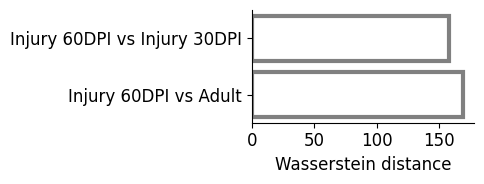

In [13]:
# Note: a smaller Wasserstein distance indicates a higher similarity between the two graphs, 
# while a larger distance indicates less similarity.

# boxplot: in case of multiple samples per condition.
# barplot: in case of one sample per condition.

gc.pl.wlkernel.compare_conditions(
    adata=adata,
    library_key=library_key,
    condition_key=condition_key,
    control_group=control_group,
    metric_key=metric_key,
    method=method,
    figsize=(5,2),
    dpi=100,
    #save="figures/stereoseq_wwlkerenl.pdf"
)